<a href="https://colab.research.google.com/github/wala-beep/wala-beep/blob/main/HeartDiseaseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exemple , we have a **Classification** problem ( 0/1 ) 

In [ ]:
#import of necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import split function , to split our dataset
from sklearn.model_selection import train_test_split
#import of our classification model  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#import of dataset
df = pd.read_csv("heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#check if there is any NULL values in our dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#we saved the dataset columns names 
feature = df.columns

In [ ]:
feature

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#split the dateset into features  and target 
y = df.target
sum(y)/len(y)

0.5445544554455446

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
#sinn dataset_clean= dataset.dropna()

In [ ]:
#drop the column "target" as we saved it in y 
df=df.drop(columns="target",axis=0)
#save other values in X 
X= df.iloc[:,0:14].values # X= df['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
#split our data set into training data and test data  
X_train ,X_test , y_train , y_test = train_test_split(X,y)

In [ ]:
X_test.shape

(76, 13)

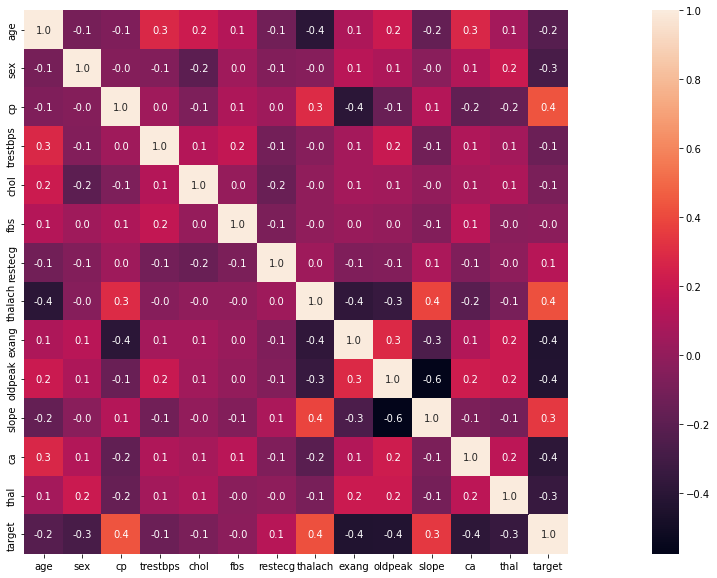

In [ ]:
#visualisation des données 
dataset = pd.read_csv("heart.csv")
correlation = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )



Decision Tree Classifier Model

In [ ]:
#build and fit the model 
hea = DecisionTreeClassifier()
heartMod = hea.fit(X_train,y_train) # mesure of how well a machine learning model generalizes to similar data to that on which it was trained
# save the model predictions in y_pred variable
y_pred = hea.predict(X_test)

In [ ]:
#check the model performance by calculating the accuracy score for K splitted data sets , DEFAULT = 5 scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(heartMod, X_train, y_train) #Determines the cross-validation splitting strategy
print(scores)

[0.84782609 0.80434783 0.73333333 0.73333333 0.75555556]


In [ ]:

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
     .format(heartMod.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(heartMod.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.82


In [ ]:
#other methode to calculate the accuracy score
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8157894736842105


In [ ]:
#global vue of the model performance , we have 75% accuracy 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        31
           1       0.90      0.78      0.83        45

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.83      0.82      0.82        76



Random Forest Classifier Model 

In [ ]:
#Build and run teh model 
forest = RandomForestClassifier(n_estimators=1000 )
forestModel = forest.fit(X_train,y_train)
# save the model predictions in y_pred_forest variable
y_pred_forest = forestModel.predict(X_test)

In [ ]:
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(forestModel.score(X_train, y_train)))
print('Accuracy of Random forest Classifier  on test set: {:.2f}'
     .format(forestModel.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random forest Classifier  on test set: 0.84


In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_forest))

Accuracy: 0.8421052631578947


In [ ]:
print(classification_report(y_test,y_pred_forest) )
#we have 84% accuracy , it's a good model since we use our data without cleaning  it .

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.87      0.87      0.87        45

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



KNeighborClassifier

In [ ]:
scores =[]
for k in range(15,20):
    neigh = KNeighborsClassifier(n_neighbors= k)
    neigh.fit(X_train,y_train)
    y_pred1= neigh.predict(X_test)
    Score = accuracy_score(y_test,y_pred1)
    scores.append(Score)


In [ ]:
scores

[0.631578947368421,
 0.631578947368421,
 0.6578947368421053,
 0.6447368421052632,
 0.6578947368421053]

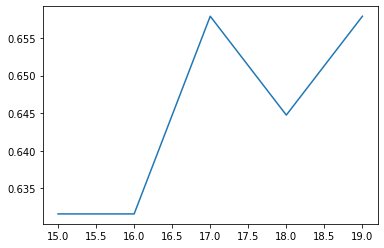

In [ ]:

fig, ax = plt.subplots()
ax.plot(range(15,20),scores)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,100)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 25}

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred2 = lr.predict(X_test)
score = accuracy_score(y_test,y_pred2)
score


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8947368421052632

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


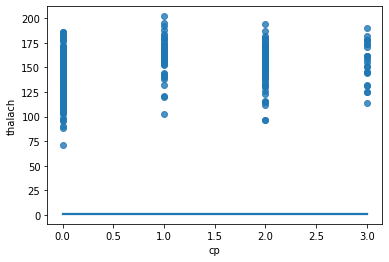

In [ ]:
sns.regplot(x = "cp", y = "thalach", data = dataset ,logistic = True) 
plt.show() 

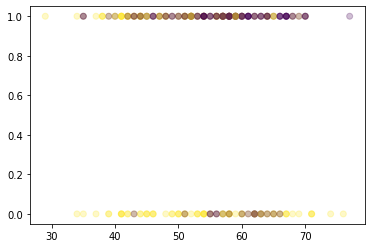

In [ ]:
fig, ax = plt.subplots()
y_all=lr.predict(X)
ax.scatter(x=X[:,0], y=X[:,1], c=y_all , alpha=.25)